<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-1/blob/main/5.a.%20Support%20Vector%20Machine%20(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

✨ ماشین بردار پشتیبان (SVM: Support Vector Machine) چیست؟

فرض کن می‌خوای دو گروه رو از هم جدا کنی:

✅ دانش‌آموزهای قبول شده ✅

❌ دانش‌آموزهای رد شده ❌

این داده‌ها رو روی یک صفحه می‌گذاری.
حالا باید یک خط بکشی که این دو گروه رو جدا کنه.
ولی…

📌 بین همه‌ی خط‌هایی که میشه کشید، SVM دنبال بهترین خط ممکن می‌گرده!
بهترین خط یعنی خطی که بیشترین فاصله رو از نزدیک‌ترین نقطه‌های هر گروه داشته باشه.
به اون نزدیک‌ترین نقطه‌ها می‌گن بردارهای پشتیبان.

🔎 پس به زبان ساده:

✅ SVM میاد داده‌ها رو نگاه می‌کنه.

✅ یک خط (یا در ابعاد بالاتر، یک صفحه) پیدا می‌کنه که گروه‌ها رو جدا کنه.

✅ این خط جوری انتخاب می‌شه که فاصله‌اش از نزدیک‌ترین داده‌ها (بردارهای پشتیبان)
حداکثر باشه.

✅ اینطوری مدل می‌تونه با اعتماد بیشتری بگه: این داده مال کدوم دسته‌ست.

🎨 یک مثال ساده با پایتون

بیایید باز هم از میوه‌ها 🍎🍊 استفاده کنیم.

ویژگی‌ها:

وزن میوه (گرم)

سطح میوه صاف است یا زبر (1 یا 0)

می‌خواهیم بفهمیم میوه 🍎 است یا 🍊

What does this fruit look like? Apple


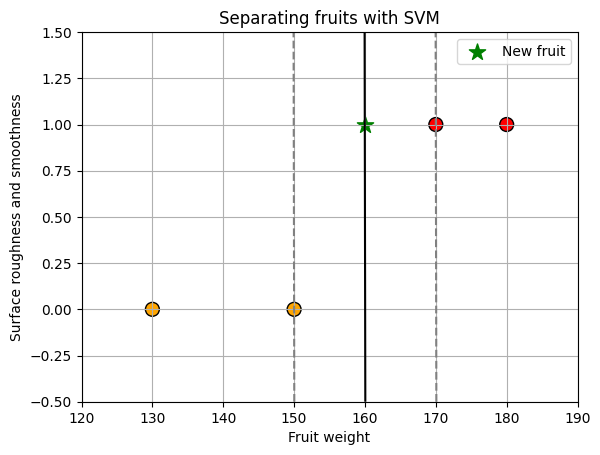

In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# داده‌های ساده: [وزن, سطح]
X = np.array([
    [150, 0],  # پرتقال (زبر)
    [130, 0],  # پرتقال
    [180, 1],  # سیب (صاف)
    [170, 1],  # سیب
])

y = ['Orange','Orange','Apple','Apple']

# ساخت مدل SVM
model = svm.SVC(kernel='linear')  # کرنل خطی برای سادگی
model.fit(X, y)

# پیش‌بینی یک میوه جدید
new_fruit = [[160, 1]]  # مثلا وزن 160 و سطح صاف
prediction = model.predict(new_fruit)
print("What does this fruit look like?", prediction[0])

# --- رسم نمودار برای درک بهتر ---
# محدوده برای رسم
xx, yy = np.meshgrid(np.linspace(120, 190, 100), np.linspace(-0.5, 1.5, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X[:,0], X[:,1], c=['orange','orange','red','red'], s=100, edgecolors='k')
plt.scatter(new_fruit[0][0], new_fruit[0][1], c='green', s=150, marker='*', label='New fruit')

# خط جداکننده و حاشیه‌ها
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
plt.contour(xx, yy, Z, colors='gray', levels=[-1, 1], linestyles=['--'])

plt.xlabel('Fruit weight') #وزن میوه
plt.ylabel('Surface roughness and smoothness') #سطح (0=زبر, 1=صاف)
plt.title('Separating fruits with SVM') #جدا کردن میوه‌ها با SVM
plt.legend()
plt.grid(True)
plt.show()
